
### Universidade Federal de Pernambuco - IF998 (Solução em Mineração de Dados)

### Professor: Leandro Almeida - lma3@cin.ufpe.br

### Alunos: 
- Daniel Moraes Costa Andrade - dmca@cin.ufpe.br
- Gustavo Prazeres Paz do Nascimento - gppn@cin.ufpe.br
- Vinicius Luiz da Silva Franca - vlsf2@cin.ufpe.br

### Aula 02 - Tipos de dados e EDA
### -------------------------------------------------------

Realizar as atividades de compreensão do problema, dos dados e a análise exploratória para o domínio Credit Approval Data Set https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Apresentar relatórios com o itens mencionados e discussões com gráficos da base de dados.

> **Informações do dataset:**
> Este arquivo diz respeito a solicitações de cartão de crédito. Todos os nomes e valores de atributos foram alterados para símbolos sem sentido para proteger a confidencialidade dos dados.


> **Informações dos atributos:**
> - A1: b, a.
> - A2: continuous.
> -A3: continuous.
> - A4: u, y, l, t.
> - A5: g, p, gg.
> - A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
> - A7: v, h, bb, j, n, z, dd, ff, o.
> - A8: continuous.
> - A9: t, f.
> - A10: t, f.
> - A11: continuous.
> - A12: t, f.
> - A13: g, p, s.
> - A14: continuous.
> - A15: continuous.
> - A16: +,- (class attribute)


###### Compreensão do problema, Compreensão dos dados e Análise exploratória dos dados

# Importando bibliotecas

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
dt_parameters = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','Class']
dataset = pd.read_csv(url, delimiter=",", names=dt_parameters)

no_registros = dataset.shape[0]
no_atributos = dataset.shape[1]

print(f'Carregado com sucesso! \n\nO Dataset possui {no_registros} registros com {no_atributos} atributos cada\n')

print('Exibindo os 10 primeiros registros:')
dataset.head(10)

Carregado com sucesso! 

O Dataset possui 690 registros com 16 atributos cada

Exibindo os 10 primeiros registros:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


# Verificando se o dataset possui valores nulos

Os valores nulos devem ser tratados quando se trata de mineração de dados. Neste caso, a base de dados não possui valores nulos.

In [3]:
dataset.replace('?', np.nan, inplace = True)
dataset.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

# Descrevendo o Dataset

Pandas describe() é usado para visualizar alguns detalhes estatísticos básicos como percentil, média, std etc. de um quadro de dados ou uma série de `valores numéricos`

In [4]:
dataset.describe([.20, .40, .60, .80])

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
20%,0.750000,0.125000,0.00000,0.000000
40%,1.934000,0.500000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
60%,4.016000,1.500000,1.00000,50.000000
80%,9.432000,3.500000,4.00000,600.000000
max,28.000000,28.500000,67.00000,100000.000000


# Ajustando atributo com tipagem errada

Ao mostrar as informações do dataset, vemos que a coluna A2 que possui valores numéricos está com a tipagem errada, vamos alterar pois este atributo apresenta dados bem distribuídos que são interessantes para exploração

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  Class   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Vamos inserir o valor da média do atributo A2 nos valores inconsistentes. Essa é uma forma de tratar dados inconsistentes sem que interfira negativamente nas análises posteriores.

In [6]:
dataset_A2 = dataset[dataset['A2'] == '?'] #Pegar valores inconsistentes em A2
dataset    =  dataset[dataset['A2'] != '?'] #Pegar valores consistentes em A2
print(f'Dataset possui {dataset.shape[0]} linhas. Temos que ajustar {dataset_A2.shape[0]} linhas que não possuem valores numéricos')
dataset.A2 = dataset.A2.astype(np.float32) #Convertendo atributo A2 para numérico
dataset_A2.loc[(dataset_A2['A2'] == '?'), 'A2'] = dataset['A2'].mean() #Inserindo a média de A2 nas instâncias inconsistentes
dataset_A2.A2 = dataset_A2.A2.astype(np.float32)
dataset = pd.concat([dataset, dataset_A2], axis=0) #Concatenando e finalizando ajuste
dataset.describe()

Dataset possui 690 linhas. Temos que ajustar 0 linhas que não possuem valores numéricos


,A2,A3,A8,A11,A15
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568169,4.758725,2.223406,2.40000,1017.385507
std,11.957860,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602501,1.000000,0.165000,0.00000,0.000000
50%,28.459999,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


# Verificando correlação entre atributos

Os atributos altamente correlacionadas são mostradas em cores mais claras, e aquelas que são negativamente correlacionadas são mostradas em cores escuras.

Ao analisar a matriz de correlação abaixo, é possível notar que os valores numéricos não são correlacionados, o que indica a independência desses valores.

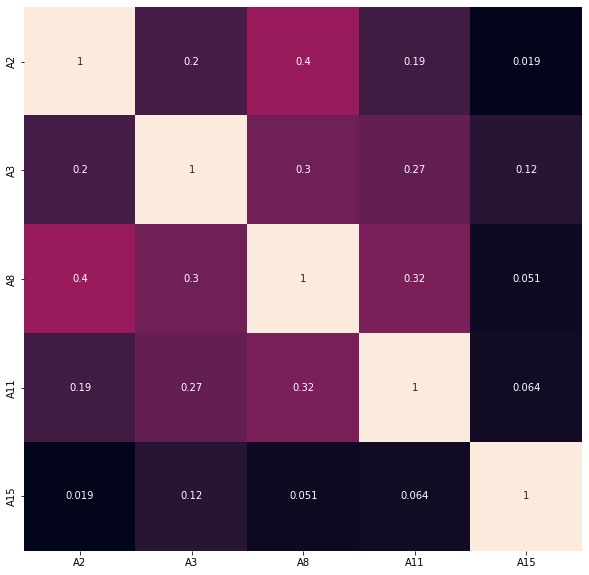

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, cbar=False)

# Histograma por classe

O histograma abaixo mostra que o atrirbuto A2 e A3 possuem os dados mais bem distribuídos, o que seria melhor para uma análise com mais probabilidade de extração de dados relevantes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

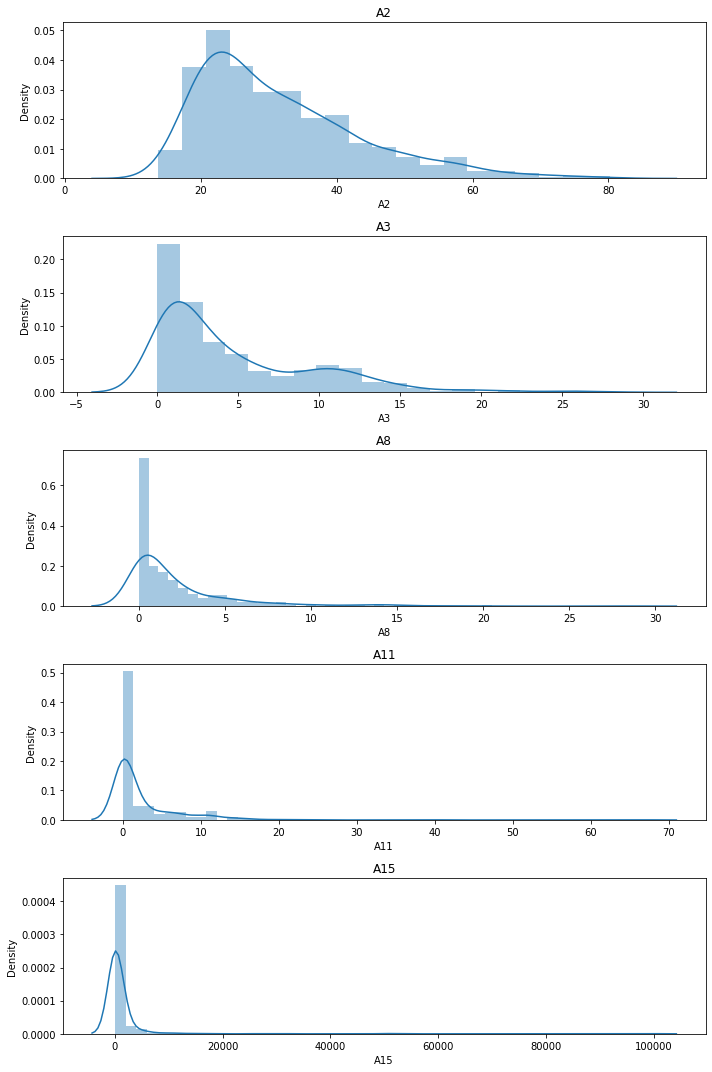

In [8]:
plt.figure(figsize = (10,15))

for i, c in enumerate(['A2','A3', 'A8', 'A11', 'A15']):
  plt.subplot(5, 1, i+1) #plt.subplot(num de linhas, numero de colunas, id do gráfico)
  sns.distplot(dataset[c], kde=True)    #além do histograma, irá gerar o KDE (Kernel Density Estimate) | gera a linha do formato da distribuição
  plt.title(c)
plt.tight_layout();

# BoxPlot
## Identificando Outliers

A definição de um outlier será diferente para cada conjunto de dados. Como regra geral, você pode considerar que qualquer coisa a mais de 3 desvios padrão da média pode ser considerada um outlier.

Nesse BoxPlot é possível mensurar os valores presentes na coluna A3 com as classes da coluna A1. O que mostra que a classe **[a]** possui valores maiores em comparação com a classe **[b]**

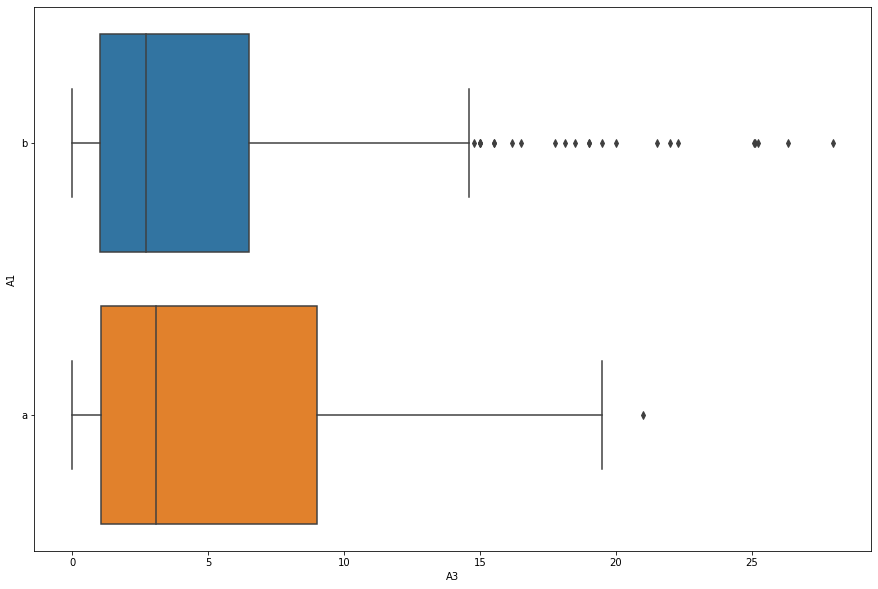

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x='A3', y='A1', data=dataset) #Verificar se existe associação entre a classe A1 e os valores A3

Já nesse outro Boxplot agrupado pela coluna **[Class]**, ao analisar o 3º quartil e o limite superior da classe **[+]**, podemos notar que o grupo da classe **[+]** possuem valores consideravelmente maiores em comparação com o grupo **[-]**.

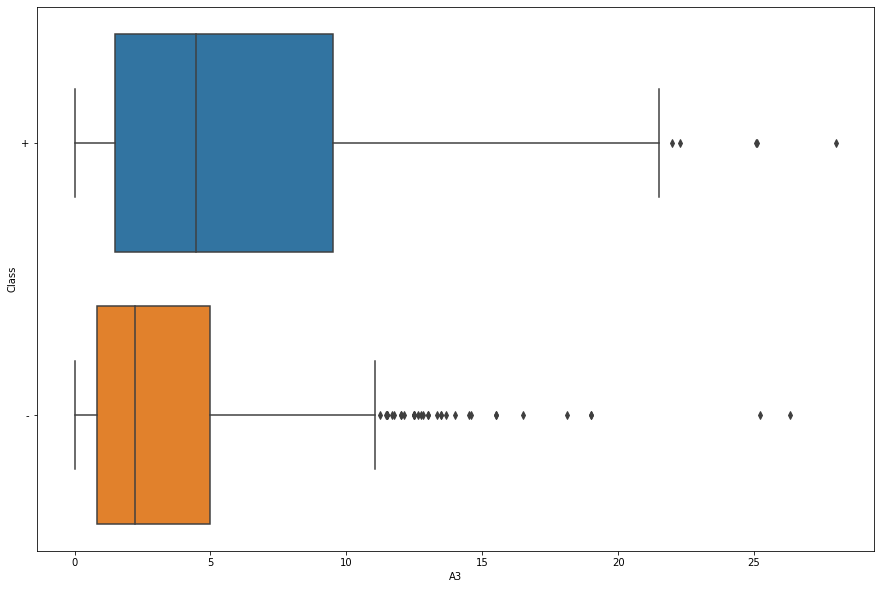

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x='A3', y='Class', data=dataset) #Verificar se existe associação entre a classes + e - e os valores A3

## Normalização dos dados
A normalização busca levar os valores das colunas a uma escala comum.
Quando a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.  Com a normalização, os algoritmos não considerarão uma coluna mais do que a outra, o que torna a acurária da mineração mais eficiente.

### Normalização de Média
É um dos métodos mais simples.  
É feita subtraindo a média e dividindo pelo desvio padrão.

### Normalização Min-Max
É um dos métodos mais atualizados.  
Subtrai o valor mínimo de um quadro de dados e divide-o pela diferença entre o valor mais alto e mais baixo da acoluna correspondente.  
Pode não ser adequada para Dataframes com muitos outliers.

### Nomralização de Quantidades
É utilizada no caso de análises de dados de alta dimensão. Onde, podemos reduzir o número de atributos.

# Gerando gráfico de área

Com esse gráfico podemos visualizar a densidade dos valores de ambas as classes

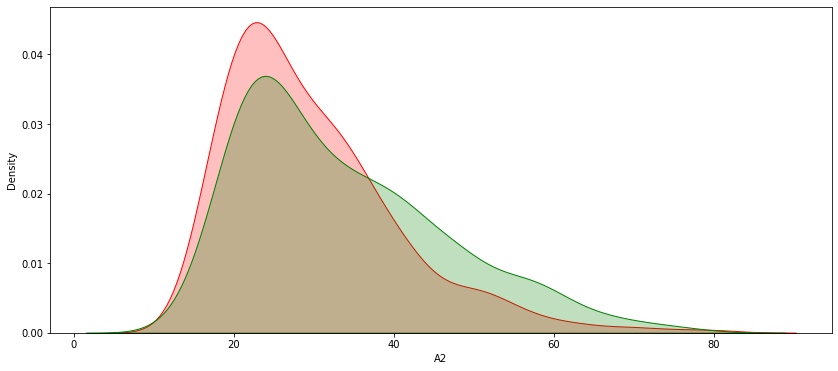

In [11]:
dataset_class_positiva =  dataset[dataset['Class'] == "+"]
dataset_class_negativa =  dataset[dataset['Class'] == "-"]
plt.figure(figsize=(14,6))

sns.kdeplot(dataset_class_negativa['A2'], label='Pessoas da classe -', color='r', shade=True, legend = True)
sns.kdeplot(dataset_class_positiva['A2'], label='Pessoas da classe +', color='g', shade=True, legend = True)

# Gerando gráficos de dispersão

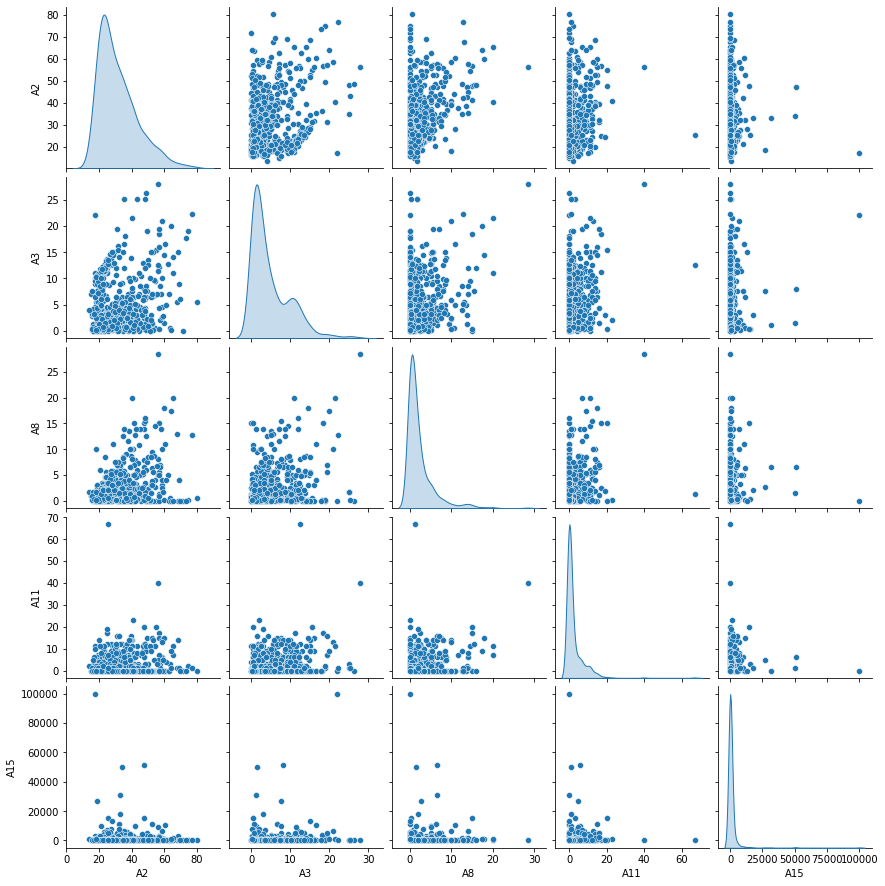

In [12]:
sns.pairplot(data=dataset, kind='scatter', diag_kind='kde')

# *Referências*

- Daniel Bourke - A Gentle Introduction to Exploratory Data Analysis - Disponível em https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

- https://github.com/mrdbourke/your-first-kaggle-submission/blob/master/kaggle-titanic-dataset-example-submission-workflow.ipynb

- Hemang Vyas, Towards data Science - EDA (Exploratory Data Analysis) - to get more insight into the data. Disponível em https://towardsdatascience.com/eda-exploratory-data-analysis-to-get-more-insight-into-the-data-b2fb74dabb82

- Normalizar uma Coluna em Pandas Dataframe - Disponível em: https://www.delftstack.com/pt/howto/python-pandas/pandas-normalize/#:~:text=%2B1%2C5.-,Normalizar%20Pandas%20Dataframe%20com%20a%20Normaliza%C3%A7%C3%A3o%20min%2Dmax,mais%20baixo%20da%20coluna%20correspondente.

- Normalizar ou padronizar as variáveis? - Disponível em: https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9
